In [1]:
import pandas as pd

In [6]:
user_cols = ['user_id','age','gender','occupation','zip-code']
users = pd.read_table('http://bit.ly/movieusers',sep='|', names=user_cols, index_col='user_id',header=None)

In [7]:
users.head()

,age,gender,occupation,zip-code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [8]:
users.shape

(943, 4)

In [12]:
users.dtypes

age            int64
gender        object
occupation    object
zip-code      object
dtype: object

In [13]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [18]:
users.describe(include=['object','int64'])

,age,gender,occupation,zip-code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [19]:
users.columns

Index(['age', 'gender', 'occupation', 'zip-code'], dtype='object')

In [20]:
users.rename(columns={'gender':'Sex','zip_code':'pincode'}, inplace=True)

In [21]:
users.columns

Index(['age', 'Sex', 'occupation', 'zip-code'], dtype='object')

#### Chaning the header name at the time of import

In [22]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [23]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [24]:
# NOw we will try to change it read time itself
ufo_read = ['City', 'Colors_reported', 'Shape_reported', 'State', 'Time']
ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_read, header = 0)
ufo.columns

Index(['City', 'Colors_reported', 'Shape_reported', 'State', 'Time'], dtype='object')

In [27]:
ufo.columns = ufo.columns.str.replace('_','__')
ufo.columns

Index(['City', 'Colors__reported', 'Shape__reported', 'State', 'Time'], dtype='object')

YOu can pick up a series  then .str and then apply any of the string methods

####  Sorting a pandas series and dataframe

user sort_value() function

In [42]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [29]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [32]:
# Soritng the series but not affecting the underlying dataframe
# movies.duration.sort_values(ascending=False) 

In [41]:
# Sorting the dataframe
movies.sort_values(by=['genre','duration'], ascending=[False,True]).head()

,star_rating,title,content_rating,genre,duration,actors_list
236,8.1,High Noon,PG,Western,85,"[u'Gary Cooper', u'Grace Kelly', u'Thomas Mitc..."
704,7.6,High Plains Drifter,R,Western,105,"[u'Clint Eastwood', u'Verna Bloom', u'Marianna..."
119,8.3,Unforgiven,R,Western,131,"[u'Clint Eastwood', u'Gene Hackman', u'Morgan ..."
107,8.3,For a Few Dollars More,APPROVED,Western,132,"[u'Clint Eastwood', u'Lee Van Cleef', u'Gian M..."
421,7.9,The Outlaw Josey Wales,PG,Western,135,"[u'Clint Eastwood', u'Sondra Locke', u'Chief D..."


#### Filter rows of a dataframe by column values

In [3]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [4]:
movies.loc[movies.duration >=200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [7]:
movies.loc[(movies.duration >= 200) & (movies.genre =='Drama'), 'genre']


17     Drama
157    Drama
476    Drama
Name: genre, dtype: object

In [9]:
movies.loc[(movies.duration >= 200) & (movies.genre.isin( ['Drama'])), ['genre','duration']]

,genre,duration
17,Drama,207
157,Drama,238
476,Drama,242


#### Iterration over the rows of pandas dataframe

In [40]:
#  Uncomment to iterrate rowwisw on a pandas dataframe

# for i, row in movies.iterrows():
#     print(i)
# #     print(row)

In [37]:
#  axis 0 is euivalent to 'index'  and axis value 1 is equivalent to 'columns'
movies.mean(axis='index')
movies.mean(axis=0)
movies.mean(axis='columns')
movies.mean(axis=1).head()

0     75.65
1     92.10
2    104.55
3     80.50
4     81.45
dtype: float64

#### Use string 'str' methods in pandas
To use string methods in pandas we use 'str' 

In [14]:
order = pd.read_table('http://bit.ly/chiporders')

In [15]:
order.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [83]:
# suppose we want to make the item_name as upper case

# order.item_name.str.upper()
# order.item_name.str.contains('chicken')
order.choice_description.str.replace(r'[\[\]]',"").head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

#### change the dtype for a series in dataframe

In [30]:
import numpy as np
order.quantity =order.quantity.astype(np.float32,inplace=True)
print(order.quantity.dtype)

float32


In [36]:
order.item_price = order.item_price.str.replace('$','')
order.item_price = order.item_price.astype(np.float16)
print(order.item_price.dtype)
order.item_price.head()

float16


0     2.390625
1     3.390625
2     3.390625
3     2.390625
4    16.984375
Name: item_price, dtype: float16

In [35]:
order.item_name.str.contains('chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    0
Name: item_name, dtype: int32

#### groupby in pandas

In [45]:
drinks = pd.read_table('http://bit.ly/drinksbycountry',sep=',')

In [46]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [67]:
drinks.groupby('continent').sum()#.sum(axis=1)#.mean()#.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,3258,866,862,159.4
Asia,1630,2677,399,95.5
Europe,8720,5965,6400,387.8
North America,3345,3812,564,137.9
Oceania,1435,935,570,54.1
South America,2101,1377,749,75.7


In [69]:
drinks.groupby('continent').agg(['mean','count', 'min','max','sum'])

beer_servings                      spirit_servings            \
                       mean count min  max   sum            mean count min   
continent                                                                    
Africa            61.471698    53   0  376  3258       16.339623    53   0   
Asia              37.045455    44   0  247  1630       60.840909    44   0   
Europe           193.777778    45   0  361  8720      132.555556    45   0   
North America    145.434783    23   1  285  3345      165.739130    23  68   
Oceania           89.687500    16   0  306  1435       58.437500    16   0   
South America    175.083333    12  93  333  2101      114.750000    12  25   

                         wine_servings                       \
               max   sum          mean count min  max   sum   
continent                                                     
Africa         152   866     16.264151    53   0  233   862   
Asia           326  2677      9.068182    44   0  123   399   
Europe         373  5965    142.222222    45   0  370  6400   
North America  438  3812     24.521739    23   1  100   564   
Oceania        254   935     35.625000    16   0  212   570   
South America  302  1377     62.416667    12   1  221   749   

              total_litres_of_pure_alcohol                          
                                      mean count  min   max    sum  
continent                                                           
Africa                            3.007547    53  0.0   9.1  159.4  
Asia                              2.170455    44  0.0  11.5   95.5  
Europe                            8.617778    45  0.0  14.4  387.8  
North America                     5.995652    23  2.2  11.9  137.9  
Oceania                           3.381250    16  0.0  10.4   54.1  
South America                     6.308333    12  3.8   8.3   75.7

In [71]:
%matplotlib inline

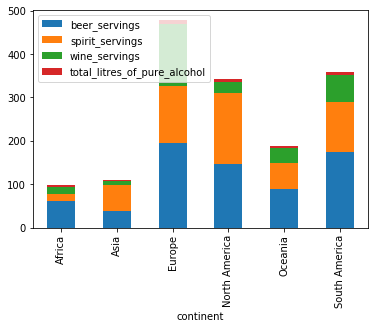

In [93]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

In [82]:
# to get the index of row for which the max values is found
drinks.groupby('continent').idxmax()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,117,96,55,124.0
Asia,141,141,92,141.0
Europe,45,15,61,15.0
North America,130,68,32,68.0
Oceania,129,40,8,8.0
South America,188,72,6,6.0


In [81]:
# this can be done to get the country name directly for the max serving for each spirit type:
#  but HERE THE ASSUMPTION IS COUNTRY ARE UNIQUE IN EACH ROW.
drinks.set_index('country').groupby('continent').idxmax()

,beer_servings,spirit_servings,total_litres_of_pure_alcohol,wine_servings
continent,,,,
Africa,Namibia,Liberia,Nigeria,Equatorial Guinea
Asia,Russian Federation,Russian Federation,Russian Federation,Laos
Europe,Czech Republic,Belarus,Belarus,France
North America,Panama,Grenada,Grenada,Canada
Oceania,Palau,Cook Islands,Australia,Australia
South America,Venezuela,Guyana,Argentina,Argentina


In [92]:
# for single spirit this can be used even in case of reapeated countries ie. country not neccessary be unique
drinks.loc[drinks.reset_index().groupby('continent').beer_servings.idxmax()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
45,Czech Republic,361,170,134,11.8,Europe
130,Panama,285,104,18,7.2,North America
129,Palau,306,63,23,6.9,Oceania
188,Venezuela,333,100,3,7.7,South America


In [90]:
drinks.loc[drinks.groupby('continent').beer_servings.idxmax()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
45,Czech Republic,361,170,134,11.8,Europe
130,Panama,285,104,18,7.2,North America
129,Palau,306,63,23,6.9,Oceania
188,Venezuela,333,100,3,7.7,South America


####  Explore a pandas Series

In [94]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [95]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [101]:
# gets the count of each values ie. how many times that value has appeared in the series
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

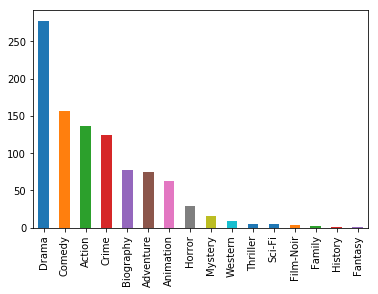

In [98]:
#  need to run %matplpotlib inline before for plots to appear in  notebook
movies.genre.value_counts().plot(kind='bar')

In [99]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [100]:
movies.genre.nunique()

16

In [113]:
#  to see the cor relation between two catgegorical series 

pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


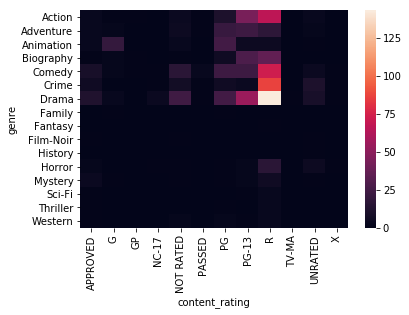

In [114]:
# For visualization we can use seaborn heatmaps.
import seaborn as sns
sns.heatmap(pd.crosstab(movies.genre,movies.content_rating))

####  Handle Missing values 

In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [6]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [7]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [8]:
print(ufo.dropna(how='all').shape)
print(ufo.dropna().shape)
# drop a row for a subset of columns
print(ufo.dropna(subset=['City','Shape Reported'], how='any').shape)

(18241, 5)
(2486, 5)
(15576, 5)


In [11]:
# to get the cound of all values along with NaN. observe that count of Nan is also given
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [12]:
ufo['Shape Reported'].fillna(value='Various', inplace=True)

#### Indexes in pandas
WHY index exist?
1. __selection__
2. __identification__
3. __alignment__

In [13]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [14]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [15]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [16]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [18]:
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [19]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [20]:
drinks.loc['Brazil', 'beer_servings']

245

In [21]:
drinks.index.name

'country'

In [22]:
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [23]:
drinks.index.name= 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [24]:
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [25]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [26]:
drinks.continent.value_counts().loc['Africa']
# or drinks.continent.value_counts().['Africa']

53

In [27]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [28]:
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [29]:
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [31]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

#### Index for alignment

In [33]:
# to demonstrate that we will be creating a dummy Series
# pd.DataFrame([[],[]],columns=[],)
people = pd.Series([300000,85000], index=['Albania', 'Andorra'], name='Population')
people

Albania    300000
Andorra     85000
Name: Population, dtype: int64

In [36]:
# suppose to get the total beer_servings - we multiply the average with population
(drinks.beer_servings*people).head()

Afghanistan           NaN
Albania        26700000.0
Algeria               NaN
Andorra        20825000.0
Angola                NaN
dtype: float64

In [39]:
pd.concat([drinks,people], axis=1,sort=False).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,300000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


#### Difference b/w loc, iloc, ix

- loc  - is for referencing with name - both row and columns wise very helpful when index is non numeric
- iloc - is for referencing with order - like 50th row and 2nd column 
- ix - is deprecated avoid using it

In [48]:
drinks.iloc[50,0:3]

beer_servings       52
spirit_servings    286
wine_servings       26
Name: Dominica, dtype: object

In [49]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [50]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [52]:
ufo.loc[[0,1,2],:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [53]:
# Note in : indexing in pandas boundary conditions are inclusivie .ie in 0:2 - 2 is inclusive here
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [54]:
# omitted index defaults to all
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [61]:
ufo.loc[:,['City','State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [63]:
# Through statement in columns
ufo.loc[:,'City':'State'].head()

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [64]:
# iloc  is for filtering rows and columsn by position from top to bottom and left to right
ufo.iloc[:,[0,3]].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [66]:
# with iloc it is exclusive of ending number like usual : notation in python ie in iloc 0:4 , 4 is exclusive in iloc but not in loc
ufo.iloc[:,0:4].head()

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [68]:
# Beware of these shortcuts this notation is refering to loc with all rows and specified columns
ufo[['City','State']].head()
#  is equivalent to   ufo.loc[:,['City','State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [69]:
# # Beware of these shortcuts this notation is refering to iloc with all columns and specified rows exclusive of ending row
ufo[0:2]
#  is equivalent to ufo.iloc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [71]:
#  ix allows you to mix - loc and iloc
drinks.ix['Albania',0]

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


89

####  Memmory Usage in pandas

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


- Observe here the Memory usage is given as 9.1+ KB i.e it is minimum 9.1 KB <br>
__But why is that approx. why pandas doen't tell the exact memory?__
- It turns out that, if you look closely you will find that there ar 2 series in our dataframe which are of type object. and in python an object can be anythin and pandas wants info() function to run faster so it just calculates the space used for the reference to the object and NOT THE ACTUAL SPACE USED BY THOSE OBJECTS

In [5]:
# we need to specify explicitly to get the full memory usage
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [7]:
#  give the memory usage for each series (columns). But again it is not deep
drinks.memory_usage()

Index                             80
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [8]:
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

To reduce the size of dataframe we can convert categorical variables of object type of 'category type

In [9]:
drinks.continent = drinks.continent.astype('category')

In [11]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [13]:
# to the codes for category dtypes use 'cat' like 'str' is used for string operations
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [15]:
drinks.continent.cat.categories

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [14]:
# now if check the memory usage for drinks
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

Observe the considerable memory usage in continent column after it has been converted to 'category' dtype

#### We can specify the order also for category dtypes

In [24]:
df = pd.DataFrame({'Id':[100,101,102,103], 'quality':['good','good','very good','excellent']})

In [25]:
df.sort_values('quality')    # Here quality is sorted alpahbetically

,Id,quality
3,103,excellent
0,100,good
1,101,good
2,102,very good


In [20]:
df.quality = df.quality.astype('category',categories=['good','very good','excellent'],ordered=True)

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [26]:
# to overcome above warning use below code

from pandas.api.types import CategoricalDtype
df['quality']=df.quality.astype(CategoricalDtype(['good','very good','excellent'], ordered=True))

In [27]:
df.sort_values('quality')  #Now the values are order in categorical preference order

,Id,quality
0,100,good
1,101,good
2,102,very good
3,103,excellent


In [28]:
df.loc[df.quality >'good',:]

,Id,quality
2,102,very good
3,103,excellent


In [29]:
# to get the some sample out of dataframe

In [33]:
drinks.sample(n=4)  #get random 4 rows

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
94,Lebanon,20,55,31,1.9,Asia
11,Bahamas,122,176,51,6.3,North America
41,Costa Rica,149,87,11,4.4,North America
13,Bangladesh,0,0,0,0.0,Asia


In [31]:
# drinks.sample(frac=0.40)   #gets the 40% of data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
38,Comoros,1,3,1,0.1,Africa
36,China,79,192,8,5.0,Asia
61,France,127,151,370,11.8,Europe
150,Senegal,9,1,7,0.3,Africa
119,Nepal,5,6,0,0.2,Asia
91,Kyrgyzstan,31,97,6,2.4,Asia
1,Albania,89,132,54,4.9,Europe
120,Netherlands,251,88,190,9.4,Europe
92,Laos,62,0,123,6.2,Asia
172,Togo,36,2,19,1.3,Africa


#### Create dummy (One hot encoding) variables in pandas

In [4]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# let's create the dummy variable for sex columns
train['sex_male'] = train['Sex'].map({'male':1,'female':0})

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
# Top level get_dummies function create on label for each value. But generally for k categorical values we use k-1 dummmy
# variables to represent those values
pd.get_dummies(train.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [13]:
#  so
pd.get_dummies(train.Sex, prefix='Sex', drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [14]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
embarked_dummies = pd.get_dummies(train.Embarked,drop_first=True,prefix='Embarked')
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [18]:
#  Dummy columns for the dataframe can be get in one go 
#  and the original columns will be 'replaced' by new dummy columns
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True) #observe origibal Sex and Embarked column are gone
#  And new columns that too without first value have arrived

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0


In [26]:
#  A simple demonstration of pandas cut functionality - NOt relate to above headline
import numpy as np

pd.cut(np.array([100,200,2500,300,3400,3900,4000,56000]), bins= [0,500,2500,np.inf],labels=[1,2,3],retbins=True)

([1, 1, 2, 1, 3, 3, 3, 3]
 Categories (3, int64): [1 < 2 < 3], array([   0.,  500., 2500.,   inf]))

#### Time Series Functionality in pandas DataFrame

In [27]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [28]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [29]:
ufo.dtypes  #obsere thie Time columns is stored as Object

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [30]:
ufo.Time = pd.to_datetime(ufo.Time)

In [31]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [32]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [61]:
#  to perfrom operation related to datetieme use 'dt' just like 'str' used for stirng operation
ufo.Time.dt.day_name().head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [69]:
# another interesting thing is you can do comparisions of datetiem objects
ts = pd.to_datetime('11/5/1999',dayfirst=False)

In [70]:
ts

Timestamp('1999-11-05 00:00:00')

In [76]:
ufo.loc[ufo.Time > ts , :].head()

,City,Colors Reported,Shape Reported,State,Time
15018,Santa Rosa,NaN,NaN,CA,1999-11-05 00:30:00
15019,Hauppauge,NaN,DISK,NY,1999-11-05 03:10:00
15020,Burlingame,NaN,VARIOUS,CA,1999-11-05 17:30:00
15021,Santa Clara,NaN,RECTANGLE,CA,1999-11-05 18:15:00
15022,Raleigh,NaN,DISK,NC,1999-11-05 18:44:00


In [82]:
#  We can do mathematical operation with date tiem format
(ufo.Time.max() - ufo.Time.min()).days
(ufo.Time.max() - ufo.Time.min())

Timedelta('25781 days 01:59:00')

In [84]:
%matplotlib inline

In [ ]:
# ploting ufo reporting by year

In [87]:
ufo['Year'] = ufo.Time.dt.year

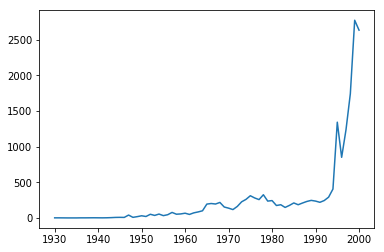

In [92]:
ufo.Year.value_counts().sort_index().plot()#kind='bar')

In [102]:
# grouping by months - thus showing the observations count month wise
ufo.resample('M', on='Time').sum().sort_index().head()

,Year
Time,
1930-06-30,3860
1930-07-31,0
1930-08-31,0
1930-09-30,0
1930-10-31,0


In [103]:
# INcreasing a date by two months
dt = pd.to_datetime('2016/9/28')
td = pd.to_timedelta('60 days')
dt + td

Timestamp('2016-11-27 00:00:00')

#### Find the duplicates in pandas

In [4]:
user_cols = ['user_id','age','gender','occupation','zip-code']
users = pd.read_table('http://bit.ly/movieusers',sep='|', names=user_cols, index_col='user_id',header=None)

In [5]:
users.head()

,age,gender,occupation,zip-code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [6]:
users.shape

(943, 4)

In [10]:
users['zip-code'].duplicated().sum()

148

In [11]:
users.duplicated().sum()

7

In [17]:
users.loc[users.duplicated(keep='last'),:]

,age,gender,occupation,zip-code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [19]:
#  dropping the duplicates
users.drop_duplicates(keep='last').shape

(936, 4)

In [20]:
users.duplicated(subset=['age','zip-code']).sum()

16

In [22]:
#  here is a way to extratct the non-duplicate rows   -> same as drop_duplicates
users=users.loc[~users.duplicated(keep='first')].reset_index(drop=True)

In [24]:
users.shape

(936, 4)

####  How to avoid 'SettingWithCopy Warning'

In [25]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [26]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [27]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [28]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [31]:
# Here comes the warning - because we are setting the values on a display copy
movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
movies.content_rating.isnull().sum()

3

In [34]:
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [35]:
movies.content_rating.isnull().sum()

68

In [39]:
# the fun part
top_movies = movies.loc[movies.star_rating >= 9,:]
top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [40]:
# trying to change the duration for the first movies in top_movies dataframe
top_movies.loc[0,'duration'] =150

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


The above line of code gives the error because the pandas doesn't know whether the top_movies is a 'view' or a 'copy' of original dataframe movies. To Explicityly specify that it is a 'copy' we should do something like this.
But observe the result above the values has actually changed -- to 150 what was intended that is the meaning of warning that pandas is not sure - that is not unsure either. It worked but still the warning.

In [42]:
top_movies = movies.loc[movies.star_rating >= 9, :].copy() #Explicity specifying that is a copy

In [43]:
top_movies.loc[0,'duration'] =150 #Now no warning in this opeartion

In [44]:
 top_movies  #changed for top_movies


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [45]:
movies.head()  #But has not changed for the original , top_movies was a copy

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
